### 4조 예습과제

#### 1. RNN

#### 1-1) RNN(Recurrent Neural Network)이 일반적인 신경망과 다른 점은 무엇인가요? RNN이 어떤 상황에서 더 유리할까요?(5점)

답 :
RNN(Recurrent Neural Network)은 일반적인 신경망(Feedforward Neural Network)과는 달리 순환 구조를 가지고 있어 이전 시점의 출력이 현재 시점의 입력으로 다시 피드백됩니다. 이는 시간적 순서나 연속적인 데이터에서 이전 상태를 기억하고 이를 다음 상태로 전달하는 기능을 제공합니다. 반면, 일반적인 신경망은 각 입력이 독립적으로 처리되며, 과거 정보에 대한 의존성이 없습니다.

RNN이 유리한 상황:
RNN은 시계열 데이터, 자연어 처리(NLP), 비디오 분석 등 시간적 순서나 문맥을 고려해야 하는 문제에서 더 유리합니다. 예를 들어, 텍스트에서 다음 단어를 예측하거나, 음성 인식에서 다음 소리를 예측하는 등, 과거의 정보가 현재와 미래의 예측에 중요한 역할을 할 때 RNN이 유리합니다.

#### 1-2) RNN에서 한 시점에서의 출력은 다음 시점의 입력에 어떻게 영향을 주나요? 간단히 설명해보세요. (5점)

답:
RNN에서는 한 시점의 출력이 다음 시점의 입력으로 피드백됩니다. 이를 통해 **이전 시점의 정보(출력)**가 현재 시점의 계산에 반영되어, 시간적으로 연속된 데이터에서 이전 상태를 반영한 출력을 생성할 수 있습니다. 즉, RNN은 현재 시점의 상태를 이전 시점의 상태와 함께 고려하여 현재의 출력을 계산하며, 이는 연속적인 패턴이나 문맥을 이해하고 학습하는 데 유리하게 작용합니다.

#### 1-3) 다음 코드에서 RNN 레이어를 정의하고 입력 데이터를 처리하는 코드를 완성해보세요.(5점)

In [ ]:
import torch
import torch.nn as nn

# RNN 레이어 정의
rnn = nn.RNN(input_size=10, hidden_size=20, num_layers=1, batch_first=True)

# 임의의 입력 데이터 (배치 크기: 5, 시퀀스 길이: 3, 입력 크기: 10)
input_data = torch.randn(5, 3, 10)

# RNN을 사용하여 입력 데이터를 처리하세요.
output, hidden = rnn(input_data)
print(output)

tensor([[[-0.4341,  0.4354,  0.5652,  0.7305,  0.2352,  0.7767,  0.0160,
          -0.3347,  0.6636,  0.7182,  0.7512,  0.4560, -0.2692, -0.2714,
           0.0754,  0.4464,  0.5713,  0.0545,  0.0395, -0.2500],
         [ 0.2774,  0.6215,  0.3933, -0.0994, -0.1349,  0.4879,  0.5123,
          -0.1349,  0.7030, -0.1607, -0.1424,  0.3875, -0.2245,  0.3414,
           0.2843,  0.4085, -0.3276,  0.5781,  0.1645, -0.3454],
         [-0.4662,  0.4235, -0.2847,  0.6498,  0.6161,  0.8022, -0.7503,
           0.4499,  0.7686, -0.4320,  0.6726,  0.8792,  0.0768, -0.2771,
          -0.5408,  0.4521,  0.4808,  0.0296, -0.5955, -0.4982]],

        [[ 0.5577, -0.0685,  0.0075, -0.3909, -0.5613, -0.4788,  0.2855,
          -0.2668, -0.0966,  0.0286,  0.4352, -0.3057,  0.1693,  0.2014,
          -0.1117,  0.0550, -0.6273, -0.0053,  0.2384,  0.3309],
         [ 0.4515, -0.1591,  0.1069, -0.3918, -0.6231, -0.2401,  0.2550,
          -0.0838, -0.0223,  0.6126,  0.1332, -0.0395, -0.4598, -0.3773,
        

#### 1-4) ???를 채워넣고, 결과를 살펴보세요. (10점)

In [ ]:
import torch
import torch.nn as nn

# RNN 모델 정의
class SimpleRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleRNN, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, hidden = self.rnn(x)
        out = self.fc(out[:, -1, :])  # RNN의 마지막 타임스텝 출력에 대해 fully connected layer 적용
        return out

# 모델 생성
model = SimpleRNN(input_size=10, hidden_size=20, output_size=1)

# 임의의 입력 데이터 (배치 크기: 5, 시퀀스 길이: 3, 입력 크기: 10)
input_data = torch.randn(5, 3, 10)

# 모델 출력을 계산
output = model(input_data)
print(output)

tensor([[-0.1803],
        [ 0.0022],
        [-0.2897],
        [-0.4217],
        [-0.6578]], grad_fn=<AddmmBackward0>)


#### 2. LSTM(Long short-term Memory)

#### 2-1) 질문: LSTM(Long Short-Term Memory)은 RNN의 한 종류인데, LSTM이 RNN보다 더 나은 이유는 무엇인가요?(5점)

답 : LSTM(Long Short-Term Memory)은 RNN의 한 종류로, 긴 시퀀스에서의 장기 의존성 문제를 해결하는 데 더 효과적입니다. RNN은 시퀀스가 길어질수록 과거의 정보를 잊어버리기 쉬운 기울기 소실(vanishing gradient) 문제를 겪습니다. 반면, LSTM은 **셀 상태(cell state)**를 통해 정보가 장기적으로 유지되도록 설계되어 있어, 중요한 정보를 오랫동안 기억할 수 있습니다. 또한, LSTM은 게이트(gate) 구조를 사용해 정보를 선택적으로 기억하거나 잊을 수 있어, RNN보다 복잡한 패턴을 더 잘 학습할 수 있습니다.

#### 2-2) 질문: LSTM은 RNN과 달리 ’셀 상태(cell state)’와 ’은닉 상태(hidden state)’를 사용하는데, 이 둘의 역할은 무엇인가요?(5점)

답 :셀 상태(cell state):
셀 상태는 LSTM에서 장기적인 정보를 전달하는 역할을 합니다. 시퀀스의 전체 길이에 걸쳐 중요한 정보를 유지하면서 전달될 수 있으며, LSTM의 게이트 구조(입력 게이트, 망각 게이트, 출력 게이트)에 의해 정보가 추가되거나 제거됩니다. 이는 LSTM이 장기 의존성을 잘 처리할 수 있게 만드는 핵심 요소입니다.

은닉 상태(hidden state):
은닉 상태는 LSTM의 단기적인 출력 정보를 전달합니다. 각 타임스텝에서 LSTM이 출력하는 값으로, 이 값은 다음 타임스텝의 계산에 사용되며, 또한 네트워크의 출력으로도 사용될 수 있습니다. 은닉 상태는 셀 상태와 함께 LSTM의 기억 메커니즘을 형성하며, 현재 타임스텝에서의 정보를 요약하여 다음 타임스텝으로 전달합니다.

#### 2-3) 질문: 다음 코드에서 LSTM 레이어를 정의하고, 입력 데이터를 처리하는 코드를 완성해보세요.(5점)

In [ ]:
import torch
import torch.nn as nn

# LSTM 레이어 정의
lstm = nn.LSTM(input_size=10, hidden_size=20, num_layers=1, batch_first=True)

# 임의의 입력 데이터 (배치 크기: 5, 시퀀스 길이: 3, 입력 크기: 10)
input_data = torch.randn(5, 3, 10)

# LSTM을 사용하여 입력 데이터를 처리하세요.
output, (hidden, cell) = lstm(input_data)

print(output)


tensor([[[-1.0725e-01,  1.6013e-01,  1.1251e-01, -2.0860e-01,  3.5297e-02,
           7.5534e-02,  1.9178e-01, -2.2835e-02, -7.2500e-03,  9.4734e-02,
          -4.8524e-02, -5.8765e-02,  1.7054e-02,  7.1341e-02, -4.4999e-02,
          -7.0909e-02,  7.2064e-02,  1.0531e-01, -1.1033e-01,  4.5063e-03],
         [-2.2596e-01,  1.1254e-01,  2.6597e-01, -2.1336e-02,  1.5457e-01,
          -1.6822e-04,  1.7778e-01, -1.5380e-01, -7.0974e-02, -1.2195e-02,
          -8.6500e-02,  3.2789e-03, -5.6952e-02, -1.6481e-02,  8.2010e-02,
           1.7395e-02,  3.8438e-02,  2.4026e-02, -2.0339e-01, -1.2188e-02],
         [-1.6531e-01, -1.4489e-03,  8.6774e-02,  3.0945e-02,  5.2553e-02,
           7.1063e-02,  1.1731e-02,  7.2849e-02, -3.5787e-02, -9.0977e-02,
           4.8024e-02,  1.4958e-02,  6.9813e-05, -1.3445e-01,  4.5265e-02,
           3.6590e-03,  1.1279e-02,  6.4844e-02, -1.0759e-01, -6.4941e-02]],

        [[ 1.1599e-01,  8.3552e-02, -2.0970e-02, -2.5280e-01, -9.4349e-03,
           4.6106e-0

#### 2-4) ???를 채워넣고, 결과를 지켜보세요.(10점)

In [ ]:
import torch
import torch.nn as nn

# LSTM 모델 정의
class SimpleLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleLSTM, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, (hidden, cell) = self.lstm(x)  # LSTM 레이어에 입력 데이터 전달
        out = self.fc(out[:, -1, :])  # LSTM의 마지막 타임스텝 출력에 대해 fully connected layer 적용
        return out

# 모델 생성
model = SimpleLSTM(input_size=10, hidden_size=20, output_size=1)

# 임의의 입력 데이터 (배치 크기: 5, 시퀀스 길이: 3, 입력 크기: 10)
input_data = torch.randn(5, 3, 10)

# 모델 출력을 계산
output = model(input_data)
print(output)


tensor([[-0.1203],
        [ 0.0357],
        [-0.0166],
        [ 0.0094],
        [-0.0486]], grad_fn=<AddmmBackward0>)


### 5조 예습과제

#### 1-1. Attention 메커니즘의 기본 아이디어를 설명하고, 어떤 문제를 해결하기 위해 도입되었는지 설명하세요. [10점]

답 : Attention 메커니즘의 기본 아이디어는 입력 시퀀스에서 중요한 부분에 더 많은 가중치를 부여하여, 모델이 중요한 정보를 집중적으로 처리하도록 하는 것입니다. 특히, 시퀀스 데이터(예: 텍스트)에서 각 단어(또는 토큰)가 다른 단어와의 관계에서 어떤 중요도를 가지는지를 평가하고, 이를 반영하여 결과를 도출합니다.

Attention 메커니즘은 **장기 의존성 문제(long-term dependency problem)**를 해결하기 위해 도입되었습니다. RNN이나 LSTM과 같은 전통적인 시퀀스 모델은 긴 시퀀스에서 중요한 정보를 효과적으로 유지하기 어렵고, 중요한 정보가 시퀀스의 초기 또는 말미에 위치할 경우 이를 놓칠 수 있습니다. Attention은 이러한 문제를 해결하여, 시퀀스 내 모든 위치의 정보를 동시에 고려할 수 있게 합니다.

#### 1-2. 아래의 빈칸을 채우시오. [7점]
Attention은 중요한 단어에 **집중**하여 **출력**에 바로 전달하는 기법이다.

#### 1-3. Self-Attention 메커니즘이 작동하는 과정을 단계 별로 나타낸 것입니다. 순서대로 나열하세요.   [8점]


  
a) Query, Key, Value 생성: 입력 시퀀스에서 Query, Key, Value 벡터를 생성합니다.  
b) 가중치 적용: 계산된 유사도를 소프트맥스 함수를 통해 가중치로 변환합니다.   
c) 유사도 계산: Query와 모든 Key 간의 유사도를 계산합니다.  
d) Weighted Sum: 각 Value 벡터에 가중치를 곱한 후, 이를 합산하여 최종 출력을 생성합니다.  


답 :  a c b d

#### 2-1. Transformer 모델의 기본 구조를 설명하고, Encoder와 Decoder의 역할을 구분하여 설명하세요.  [7점]


답:
- 기본 구조:
Transformer 모델은 완전히 병렬화된 인코더-디코더 아키텍처로 구성되며, 순차적으로 데이터를 처리하지 않고 전체 시퀀스를 한 번에 처리할 수 있습니다. Transformer는 Self-Attention 메커니즘과 피드포워드 신경망을 사용해 시퀀스 데이터를 처리합니다. 기본적으로 여러 개의 인코더와 디코더 블록이 쌓여 있으며, 각각은 Attention과 피드포워드 층으로 이루어져 있습니다.

- Encoder:
인코더는 입력 시퀀스를 받아, 입력의 특징을 추출하고 이를 **잠재 표현(latent representation)**으로 변환합니다. 각 인코더 레이어는 Self-Attention과 피드포워드 신경망으로 구성되며, 입력 시퀀스의 각 토큰에 대해 중요한 정보를 추출하여 더 높은 수준의 표현을 만듭니다. 인코더는 전체 입력 시퀀스를 동시에 처리하며, 중요한 관계를 학습합니다.

- Decoder:
디코더는 인코더로부터 생성된 잠재 표현을 받아, 출력 시퀀스를 생성합니다. 디코더 역시 여러 층으로 구성되며, 각 층은 Self-Attention, 인코더-디코더 Attention, 피드포워드 신경망으로 이루어져 있습니다. 디코더는 이전에 생성된 출력 토큰들과 인코더의 출력을 조합하여 다음 출력을 생성하며, 시퀀스의 마지막에 도달할 때까지 이 과정을 반복합니다.








#### 2-2. 다음은 트랜스포머의 구조이다. 빈칸을 채우시오. [7점]
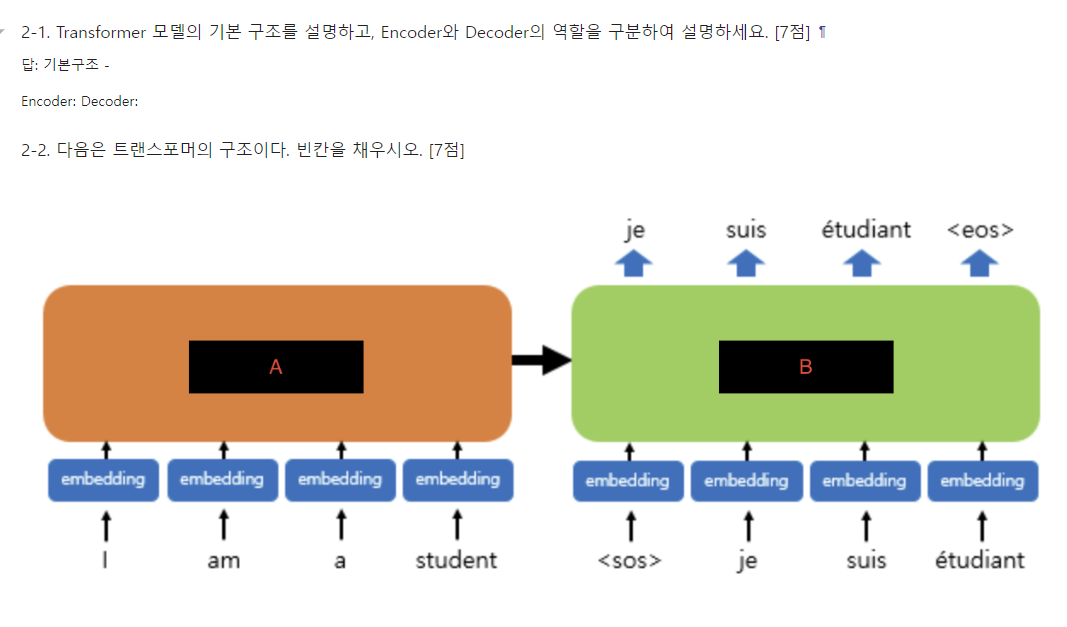

답 : Encoder, Decoder

#### 2-3. 아래는 여러번의 어텐션을 병렬로 사용하는 multihead attention의 구조를 표현한 그림과, 한 예시로 병렬 어텐션을 표현한 그림이다.     
#### 주어진 예시에서 병렬 어텐션 헤드의 개수를 구하고, multihead attention의 효과로 각 연산과정의 몇 배가 필요한지 구하시오. [10점]
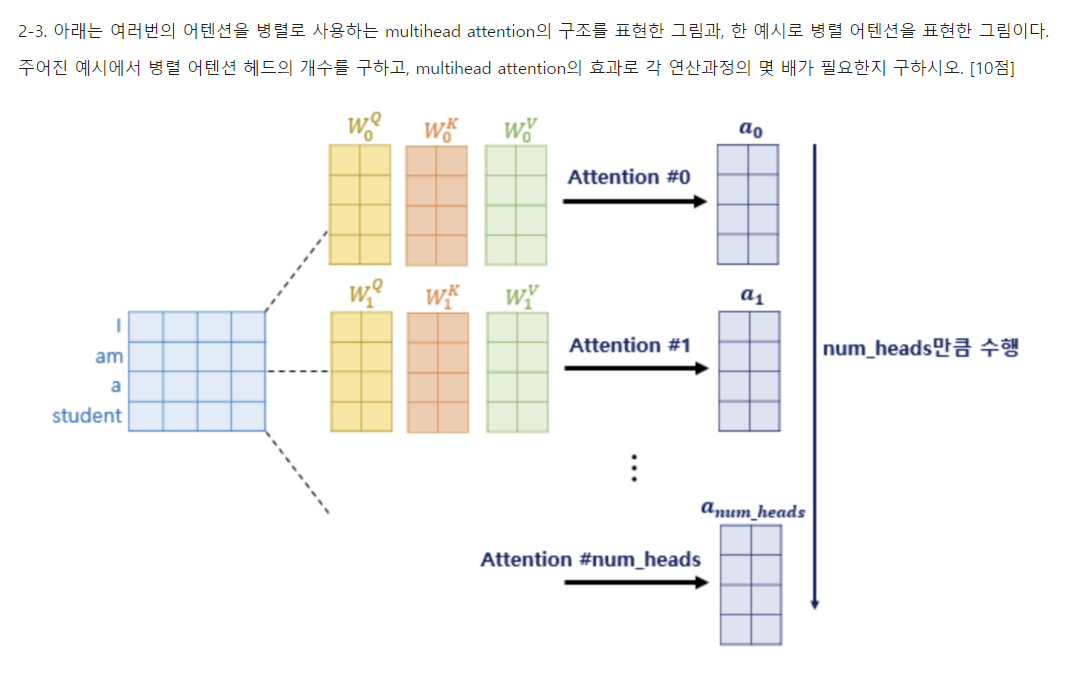


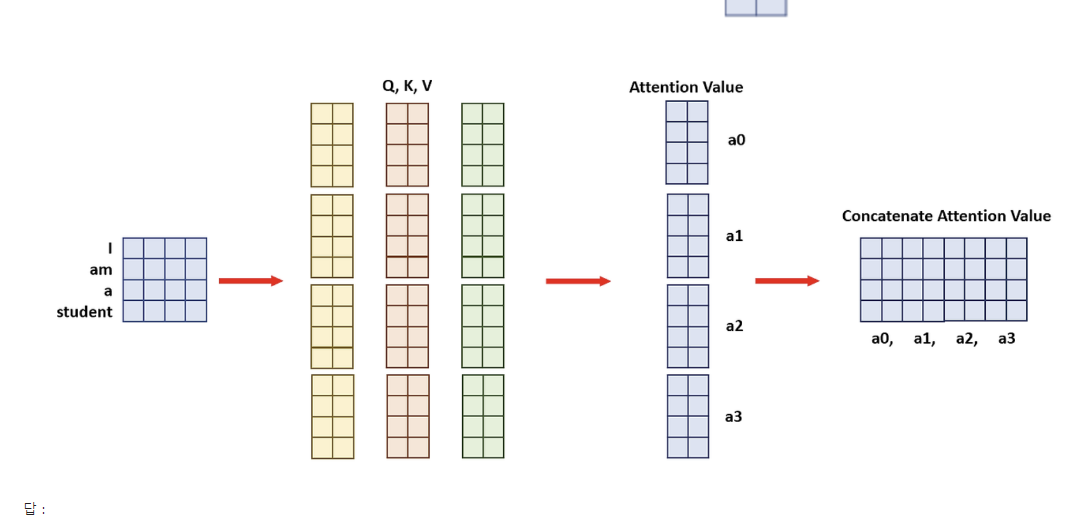

답 : 주어진 그림은 Multihead Attention의 구조를 설명하고 있습니다. Multihead Attention은 여러 개의 Attention 헤드를 병렬로 수행하여 각 헤드의 결과를 합치는 방식으로 작동합니다.

1. **병렬 어텐션 헤드의 개수**:  
   첫 번째 그림에서 병렬 어텐션 헤드의 개수는 그림에 "Attention #0", "Attention #1", ..., "Attention #num_heads"로 표시된 것에서 알 수 있습니다. 주어진 예시에서 병렬 어텐션 헤드의 개수는 `num_heads`입니다. 하지만 예시로 주어진 두 번째 그림에서 구체적으로 몇 개의 헤드가 사용되었는지는 각기 다른 Q, K, V 행렬이 몇 개의 Attention Value로 나뉘어 처리되는지에 따라 결정됩니다. 예시 그림에서는 4개의 Attention 헤드(a0, a1, a2, a3)를 사용하고 있습니다.

2. **Multihead Attention의 효과로 필요한 연산과정의 배수**:  
   각 Attention 헤드는 독립적으로 Q, K, V 행렬을 사용해 연산을 수행하고, 최종적으로 이들을 모두 합쳐 결과를 도출합니다. 따라서, Multihead Attention의 경우 일반적인 Attention 메커니즘에 비해 연산량이 `num_heads` 배 더 필요합니다. 예를 들어, 4개의 헤드가 있는 경우, 연산과정의 복잡성은 4배가 됩니다.

결론적으로, 주어진 예시에서는 병렬 어텐션 헤드의 개수는 4개이며, Multihead Attention을 사용할 때 각 연산과정의 연산량은 일반적인 경우에 비해 4배가 필요합니다.

#### 2-4.트랜스포머의 사용 분야에 대해 간단히 서술하시오.  [4점]

답 : 트랜스포머(Transformer)는 **자연어 처리(NLP)**와 컴퓨터 비전 등 다양한 분야에서 널리 사용되고 있습니다. 특히, 트랜스포머는 언어 모델링(예: GPT, BERT), 번역(예: Google Translate), 텍스트 요약, 질문 답변과 같은 자연어 처리 작업에서 혁신을 일으켰습니다. 또한, 이미지 인식 및 생성(예: Vision Transformer, DALL-E)과 같은 컴퓨터 비전 작업에도 적용되어 뛰어난 성능을 보여주고 있습니다. 트랜스포머는 시퀀스 데이터를 효과적으로 처리할 수 있는 강력한 모델로, 다양한 딥러닝 작업에서 핵심적인 역할을 하고 있습니다.